In [ ]:
Evaluating the linear regression model

In [10]:
from sklearn import datasets
boston = datasets.load_boston()

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(boston.data, boston.target)

from sklearn.model_selection import cross_val_predict

predictions_cv = cross_val_predict(lr, boston.data, boston.target, cv=10)

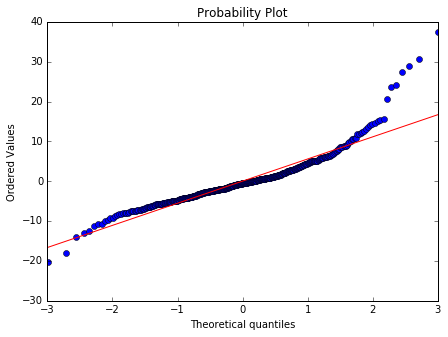

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from scipy.stats import probplot
f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
tuple_out = probplot(boston.target - predictions_cv, plot=ax)

In [12]:
tuple_out[1]

(5.5560707355666992, 0.0334913195860903, 0.93986352421027886)

In [13]:
def MSE(target, predictions):
    squared_deviation = np.power(target - predictions, 2)
    return np.mean(squared_deviation)

In [14]:
MSE(boston.target, predictions_cv)

34.597042557681789

In [16]:
def MAD(target, predictions):
    absolute_deviation = np.abs(target - predictions)
    return np.mean(absolute_deviation)

MAD(boston.target, predictions_cv)

4.0026717883592893

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
 
print 'MAE: ', mean_absolute_error(boston.target, predictions)
print 'MSE: ', mean_squared_error(boston.target, predictions)

MAE:  4.00267178836
MSE:  34.5970425577


In [18]:
n_bootstraps = 1000
len_boston = len(boston.target)
subsample_size = np.int(0.5*len_boston)

subsample = lambda: np.random.choice(np.arange(0, len_boston),size=subsample_size)
coefs = np.ones(n_bootstraps) #pre-allocate the space for the coefs
for i in range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = boston.data[subsample_idx]
    subsample_y = boston.target[subsample_idx]
    lr.fit(subsample_X, subsample_y)
    coefs[i] = lr.coef_[0]

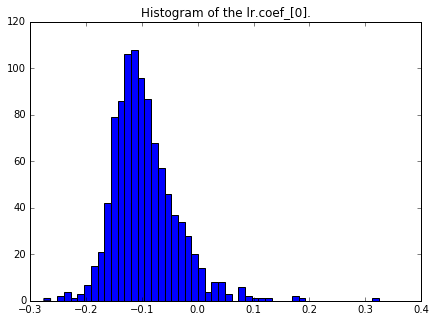

In [19]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
ax.hist(coefs, bins=50)
ax.set_title("Histogram of the lr.coef_[0].")

In [20]:
np.percentile(coefs, [2.5, 97.5])

array([-0.18668677,  0.03964632])